In [1]:
import pomegranate as pg

In [2]:
guest = pg.DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

In [3]:
prize = pg.DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

In [4]:
monty = pg.ConditionalProbabilityTable(
    [[ 'A', 'A', 'A', 0.0 ],
     [ 'A', 'A', 'B', 0.5 ],
     [ 'A', 'A', 'C', 0.5 ],
     [ 'A', 'B', 'A', 0.0 ],
     [ 'A', 'B', 'B', 0.0 ],
     [ 'A', 'B', 'C', 1.0 ],
     [ 'A', 'C', 'A', 0.0 ],
     [ 'A', 'C', 'B', 1.0 ],
     [ 'A', 'C', 'C', 0.0 ],
     [ 'B', 'A', 'A', 0.0 ],
     [ 'B', 'A', 'B', 0.0 ],
     [ 'B', 'A', 'C', 1.0 ],
     [ 'B', 'B', 'A', 0.5 ],
     [ 'B', 'B', 'B', 0.0 ],
     [ 'B', 'B', 'C', 0.5 ],
     [ 'B', 'C', 'A', 1.0 ],
     [ 'B', 'C', 'B', 0.0 ],
     [ 'B', 'C', 'C', 0.0 ],
     [ 'C', 'A', 'A', 0.0 ],
     [ 'C', 'A', 'B', 1.0 ],
     [ 'C', 'A', 'C', 0.0 ],
     [ 'C', 'B', 'A', 1.0 ],
     [ 'C', 'B', 'B', 0.0 ],
     [ 'C', 'B', 'C', 0.0 ],
     [ 'C', 'C', 'A', 0.5 ],
     [ 'C', 'C', 'B', 0.5 ],
     [ 'C', 'C', 'C', 0.0 ]], [guest, prize])

In [5]:
s1 = pg.State(guest, name="guest")
s2 = pg.State(prize, name="prize")
s3 = pg.State(monty, name="monty")

In [6]:
# Create the Bayesian network object with a useful name
model = pg.BayesianNetwork("Monty Hall Problem")

# Add the three states to the network 
model.add_states(s1, s2, s3)

For now edges are added from parent -> child by calling `model.add_edge(parent, child)`.

In [7]:
# Monty is dependent on both guest and prize
model.add_edge(s1, s3)
model.add_edge(s2, s3)

In [8]:
model.bake()

In [9]:
model.structure

((), (), (0, 1))

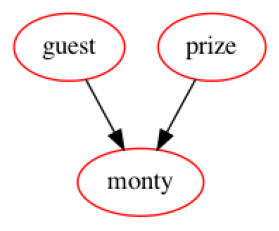

In [10]:
model.plot()

In [11]:
model

{
    "class" : "BayesianNetwork",
    "name" : "Monty Hall Problem",
    "structure" : [
        [],
        [],
        [
            0,
            1
        ]
    ],
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "A" : 0.3333333333333333,
                        "B" : 0.3333333333333333,
                        "C" : 0.3333333333333333
                    }
                ],
                "frozen" : false
            },
            "name" : "guest",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
     

In [12]:
observations = {
    'guest': 'A',
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

guest	A
prize	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333333,
            "B" : 0.3333333333333333,
            "C" : 0.3333333333333333
        }
    ],
    "frozen" : false
}
monty	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "C" : 0.49999999999999983,
            "A" : 0.0,
            "B" : 0.49999999999999983
        }
    ],
    "frozen" : false
}


In [13]:
observations = {
    'guest': 'A',
    'monty': 'C',
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

guest	A
prize	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333334,
            "B" : 0.6666666666666664,
            "C" : 0.0
        }
    ],
    "frozen" : false
}
monty	C


Train model with more data

In [14]:
data = [[ 'A', 'A', 'A' ],
        [ 'A', 'A', 'A' ],
        [ 'A', 'A', 'A' ],
        [ 'A', 'A', 'A' ],
        [ 'A', 'A', 'A' ],
        [ 'B', 'B', 'B' ],
        [ 'B', 'B', 'C' ],
        [ 'C', 'C', 'A' ],
        [ 'C', 'C', 'C' ],
        [ 'C', 'C', 'C' ],
        [ 'C', 'C', 'C' ],
        [ 'C', 'B', 'A' ]]

model.fit(data)

{
    "class" : "BayesianNetwork",
    "name" : "Monty Hall Problem",
    "structure" : [
        [],
        [],
        [
            0,
            1
        ]
    ],
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "A" : 0.4166666666666667,
                        "B" : 0.16666666666666666,
                        "C" : 0.4166666666666667
                    }
                ],
                "frozen" : false
            },
            "name" : "guest",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
    

In [15]:
model.predict_proba({})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.4166666666666666,
                   "B" : 0.1666666666666669,
                   "C" : 0.4166666666666666
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.4166666666666665,
                   "B" : 0.25000000000000017,
                   "C" : 0.33333333333333337
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "C" : 0.305

In [16]:
observations = {
    'guest': 'A',
    'prize': 'A'
}
beliefs = map(str, model.predict_proba(observations))
print("\n".join( "{}\t{}".format(state.name, belief) for state, belief in zip(model.states, beliefs)))

guest	A
prize	A
monty	{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "C" : 0.0,
            "A" : 1.0,
            "B" : 0.0
        }
    ],
    "frozen" : false
}
